<a href="https://colab.research.google.com/github/kemontz/Pengolahan_Citra_digital/blob/main/Denoising_an_Image_using_Mean_and_Median_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage import img_as_ubyte
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow


In [ ]:
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', "Lenna.png")
img = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
x,y = img.shape
g = np.zeros((x,y), dtype=np.float32)
pepper = 0.1
salt = 0.95
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = img[i][j]

img_noise = g


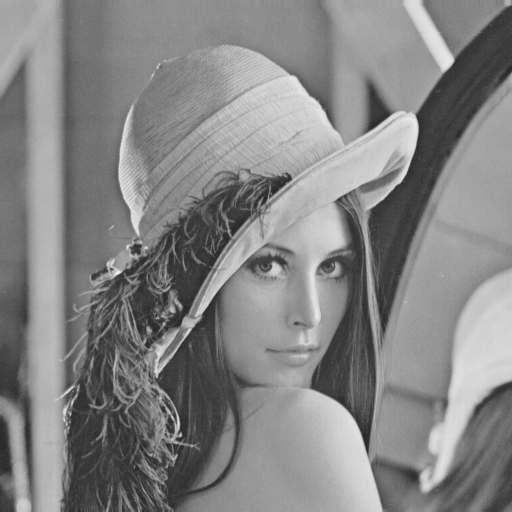

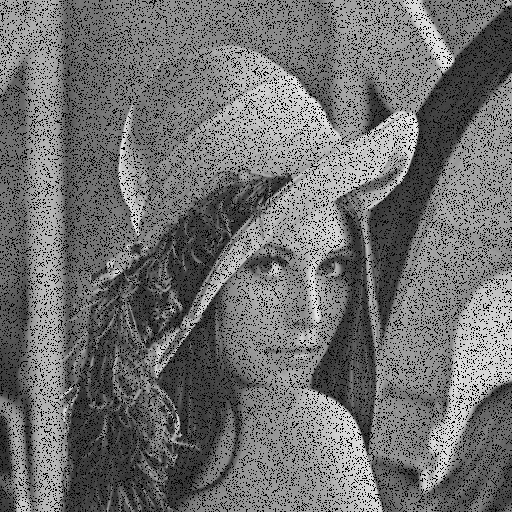

In [ ]:

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(img)
cv2_imshow(img_noise)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
## denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(img_noise, (m,n))

In [ ]:
# median filter
img_noise_median = np.clip(img_noise, -1, 1) #pixel value range
img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 5)

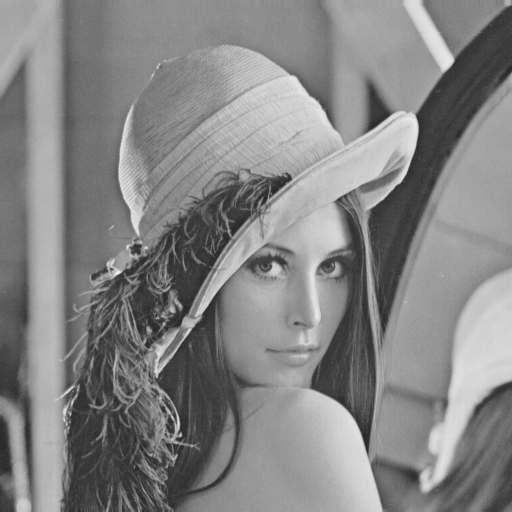

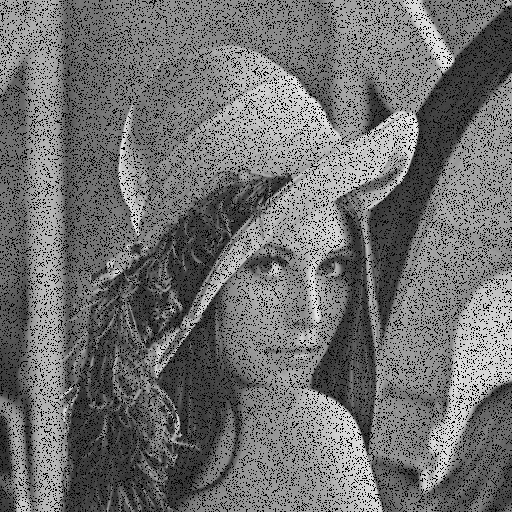

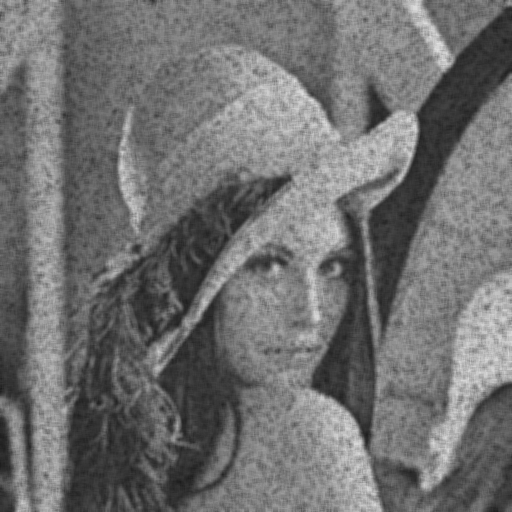

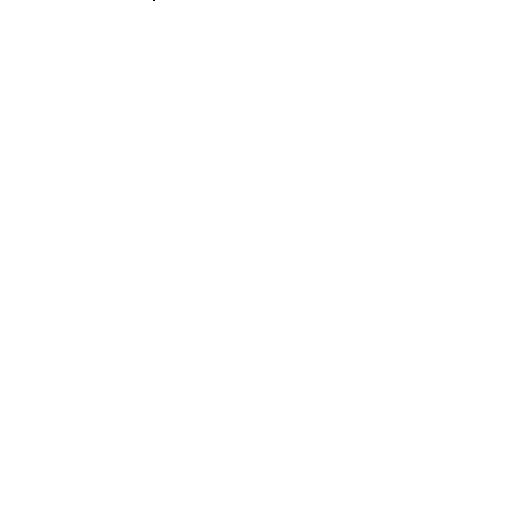

In [ ]:


# preview the images
cv2_imshow(img)
cv2_imshow(img_noise)
cv2_imshow(denoise_mean)
cv2_imshow(denoise_median)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# (optional) save the result
# Normalize denoise_mean to the range 0-1 before converting to uint8
denoise_mean_normalized = denoise_mean / 255.0
cv2.imwrite('Denoise mean.jpg', img_as_ubyte(denoise_mean_normalized))

cv2.imwrite('Denoise median.jpg', img_as_ubyte(denoise_median))

True